# One-dimensional Energy Balance Model

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def one_dimensional_ebm(num_latitudes=90, time_steps=1000, dt=0.1):
    """
    Simulates a 1D Energy Balance Model (EBM) for Earth's climate, computing 
    temperature distribution across latitudes.

    Parameters:
    -----------
    num_latitudes : int, optional
        Number of latitude bands (default: 90, for 2-degree bands from -90 to 90).
    time_steps : int, optional
        Number of time steps for simulation (default: 1000).
    dt : float, optional
        Time step size in years (default: 0.1).

    Returns:
    --------
    latitudes : ndarray
        Array of latitude values in degrees.
    temperatures : ndarray
        Final temperature distribution across latitudes (in Kelvin).

    Notes:
    ------
    The model includes:
    - Solar insolation varying with latitude.
    - Ice-albedo feedback using max function to set higher albedo for cold regions.
    - Outgoing longwave radiation (linearized approximation).
    - Meridional heat transport modeled as diffusion.
    """
    
    # Constants
    S0 = 1366  # Solar constant (W/m^2)
    sigma = 5.67e-8  # Stefan-Boltzmann constant (W/m^2/K^4)
    A = 210  # OLR constant (W/m^2)
    B = 2  # OLR temperature dependence (W/m^2/K)
    D = 0.6  # Diffusion coefficient for heat transport (W/m^2/K)
    C = 2e7  # Heat capacity of atmosphere-surface system (J/m^2/K)
    
    # Latitude grid: -90 to 90 degrees
    latitudes = np.linspace(-90, 90, num_latitudes)
    dphi = np.deg2rad(2)  # Latitude step in radians (2 degrees)
    phi = np.deg2rad(latitudes)  # Convert latitudes to radians
    
    # Solar insolation (approximated as a function of latitude)
    S = S0 / 4 * (1 - 0.482 * (3 * np.sin(phi)**2 - 1) / 2)  # Legendre polynomial P2
    
    # Initialize temperature (in Kelvin)
    T = np.ones(num_latitudes) * 280  # Start with uniform 280K
    
    # Time stepping
    for _ in range(time_steps):
        # Albedo with ice-albedo feedback
        albedo = np.array([max(0.6, 0.3) if t < 263 else 0.3 for t in T])
        # max(0.6, 0.3) sets albedo to 0.6 (ice) if T < 263K, else 0.3 (no ice)
        
        # Incoming solar radiation
        Q = S * (1 - albedo)
        
        # Outgoing longwave radiation (linearized)
        OLR = A + B * (T - 273)
        
        # Meridional heat transport (diffusion)
        # Second derivative of T w.r.t. latitude
        dT_dphi2 = np.zeros(num_latitudes)
        for i in range(1, num_latitudes-1):
            dT_dphi2[i] = (T[i+1] - 2*T[i] + T[i-1]) / dphi**2
        # Boundary conditions: no flux at poles
        dT_dphi2[0] = (T[1] - T[0]) / dphi**2
        dT_dphi2[-1] = (T[-2] - T[-1]) / dphi**2
        
        # Heat transport term
        transport = D * (1 - np.sin(phi)**2) * dT_dphi2
        
        # Energy balance equation: dT/dt = (Q - OLR + transport) / C
        dT_dt = (Q - OLR + transport) / C
        
        # Update temperature
        T += dt * dT_dt
    
    return latitudes, T



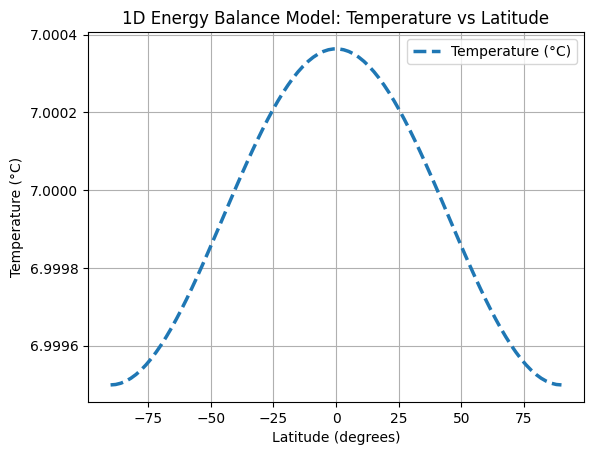

In [3]:
# Run the model
latitudes, temperatures = one_dimensional_ebm(num_latitudes=90, time_steps=1000, dt=0.1)

# Plot results
plt.plot(latitudes, temperatures - 273, linestyle = '--', label='Temperature (°C)',linewidth=2.5)
plt.xlabel('Latitude (degrees)')
plt.ylabel('Temperature (°C)')
plt.title('1D Energy Balance Model: Temperature vs Latitude')
plt.grid(True)
plt.legend()

# Add this line to show values as regular floats
plt.ticklabel_format(useOffset=False)

plt.show()

## Example 1: No Ice-Albedo Feedback